# Graph IV

In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    final_result: float

In [14]:
# Conditional agent function
# These agents performs an operation based on the 'operation' field in the state.
def addition_agent(state: AgentState) -> AgentState:
    """Agent that adds two numbers."""
    result = state["number1"] + state["number2"]
    state["final_result"] = result
    return state

def multiplication_agent(state: AgentState) -> AgentState:
    """Agent that multiplies two numbers."""
    result = state["number1"] * state["number2"]
    state["final_result"] = result
    return state

def subtraction_agent(state: AgentState) -> AgentState:
    """Agent that subtracts two numbers."""
    result = state["number1"] - state["number2"]
    state["final_result"] = result
    return state

def division_agent(state: AgentState) -> AgentState:
    """Agent that divides two numbers."""
    if state["number2"] == 0:
        state["final_result"] = float('inf')  # Handle division by zero
    else:
        result = state["number1"] / state["number2"]
        state["final_result"] = result
    return state

In [13]:
# Decision function to choose the next agent based on the operation
def decide_next_node(state: AgentState) -> str:
    """Decides the next node based on the operation."""
    
    match state["operation"]:
        case "+":
            return "addition_operation"
        case "-":
            return "subtraction_operation"
        case "*":   
            return "multiplication_operation"
        case "/":
            return "division_operation"

In [15]:
graph = StateGraph(AgentState)

# Add the nodes to the graph
graph.add_node("addition_agent", addition_agent)
graph.add_node("subtraction_agent", subtraction_agent)
graph.add_node("multiplication_agent", multiplication_agent)
graph.add_node("division_agent", division_agent)

# Decision making node
# graph.add_node("router", decide_next_node)    # This won't work as intended
graph.add_node("router", lambda state: state) # passthrough node (function)

# Add edges
graph.add_edge(START, "router")
# Add conditional edges from router to each agent
graph.add_conditional_edges(
    "router", # source node
    decide_next_node, # decision function which will return the next node name
    {
        "addition_operation": "addition_agent",
        "subtraction_operation": "subtraction_agent",
        "multiplication_operation": "multiplication_agent",
        "division_operation": "division_agent"
    }   # mapping of possible next nodes 
    # ["addition_agent", "subtraction_agent", "multiplication_agent", "division_agent"]   # if the name returned by decision function are same to node names
)

graph.add_edge("addition_agent", END)
graph.add_edge("subtraction_agent", END)
graph.add_edge("multiplication_agent", END)
graph.add_edge("division_agent", END)

# Compile the graph
app = graph.compile()

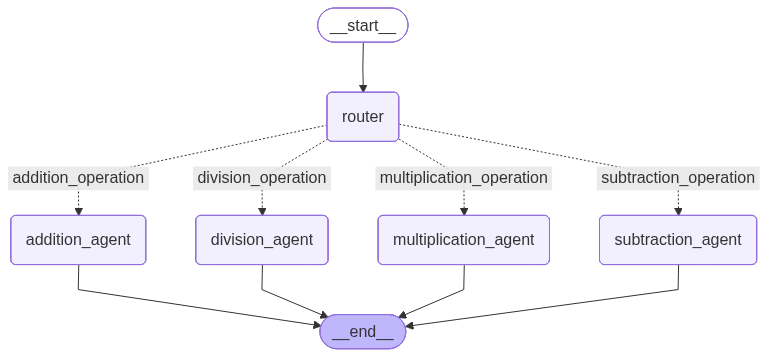

In [11]:
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
initial_state_1: AgentState = {
    "number1": 10,
    "number2": 5,
    "operation": "+"
}

print(app.invoke(initial_state_1)["final_result"])

initial_state_2: AgentState = {
    "number1": 20,
    "number2": 10,
    "operation": "-"
}

print(app.invoke(initial_state_2)["final_result"])

initial_state_3: AgentState = {
    "number1": 4,
    "number2": 6,
    "operation": "*"
}
print(app.invoke(initial_state_3)["final_result"])

initial_state_4: AgentState = {
    "number1": 25,
    "number2": 5,
    "operation": "/"
}

print(app.invoke(initial_state_4)["final_result"])

15
10
24
5.0
